In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
np.random.seed (1)

In [39]:
pdata= pd.read_csv('pulsar_stars.csv')

In [40]:
pdata[1:10]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [41]:
data=pdata.values

In [42]:
print("data shape",data.shape)

data shape (17898, 9)


In [43]:
pos=len(data[data[:,8]>0])
print("positive examples",pos)
neg=len(data[data[:,8]==0])
print("negative examples",neg)

positive examples 1639
negative examples 16259


In [7]:
cor=np.corrcoef(data, rowvar=False)
print("cor between all other attr and targets=")
print(cor[8])
print("cor between 0 and 2=",cor[0][2])
print("cor between 0 and 3=",cor[0][3])
print("cor between 2 and 3=",cor[2][3])


cor between all other attr and targets=
[-0.67318058 -0.36370821  0.79159138  0.70952802  0.40087609  0.49153506
 -0.39081632 -0.2591167   1.        ]
cor between 0 and 2= -0.8738983834481334
cor between 0 and 3= -0.7387748435301912
cor between 2 and 3= 0.9457290558159374


So the variable 3 "Excess kurtosis of the integrated profile" matters the most

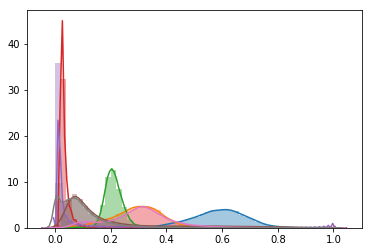

In [8]:
ndata=data
for i in range(8):
    mn=np.min(data[:,i])
    mx=np.max(data[:,i])
    avg=np.mean(data[:,i])
    ndata[:,i]=(data[:,i]-mn)/(mx-mn)
    sns.distplot(ndata[:,i])

/home/swapnil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/swapnil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


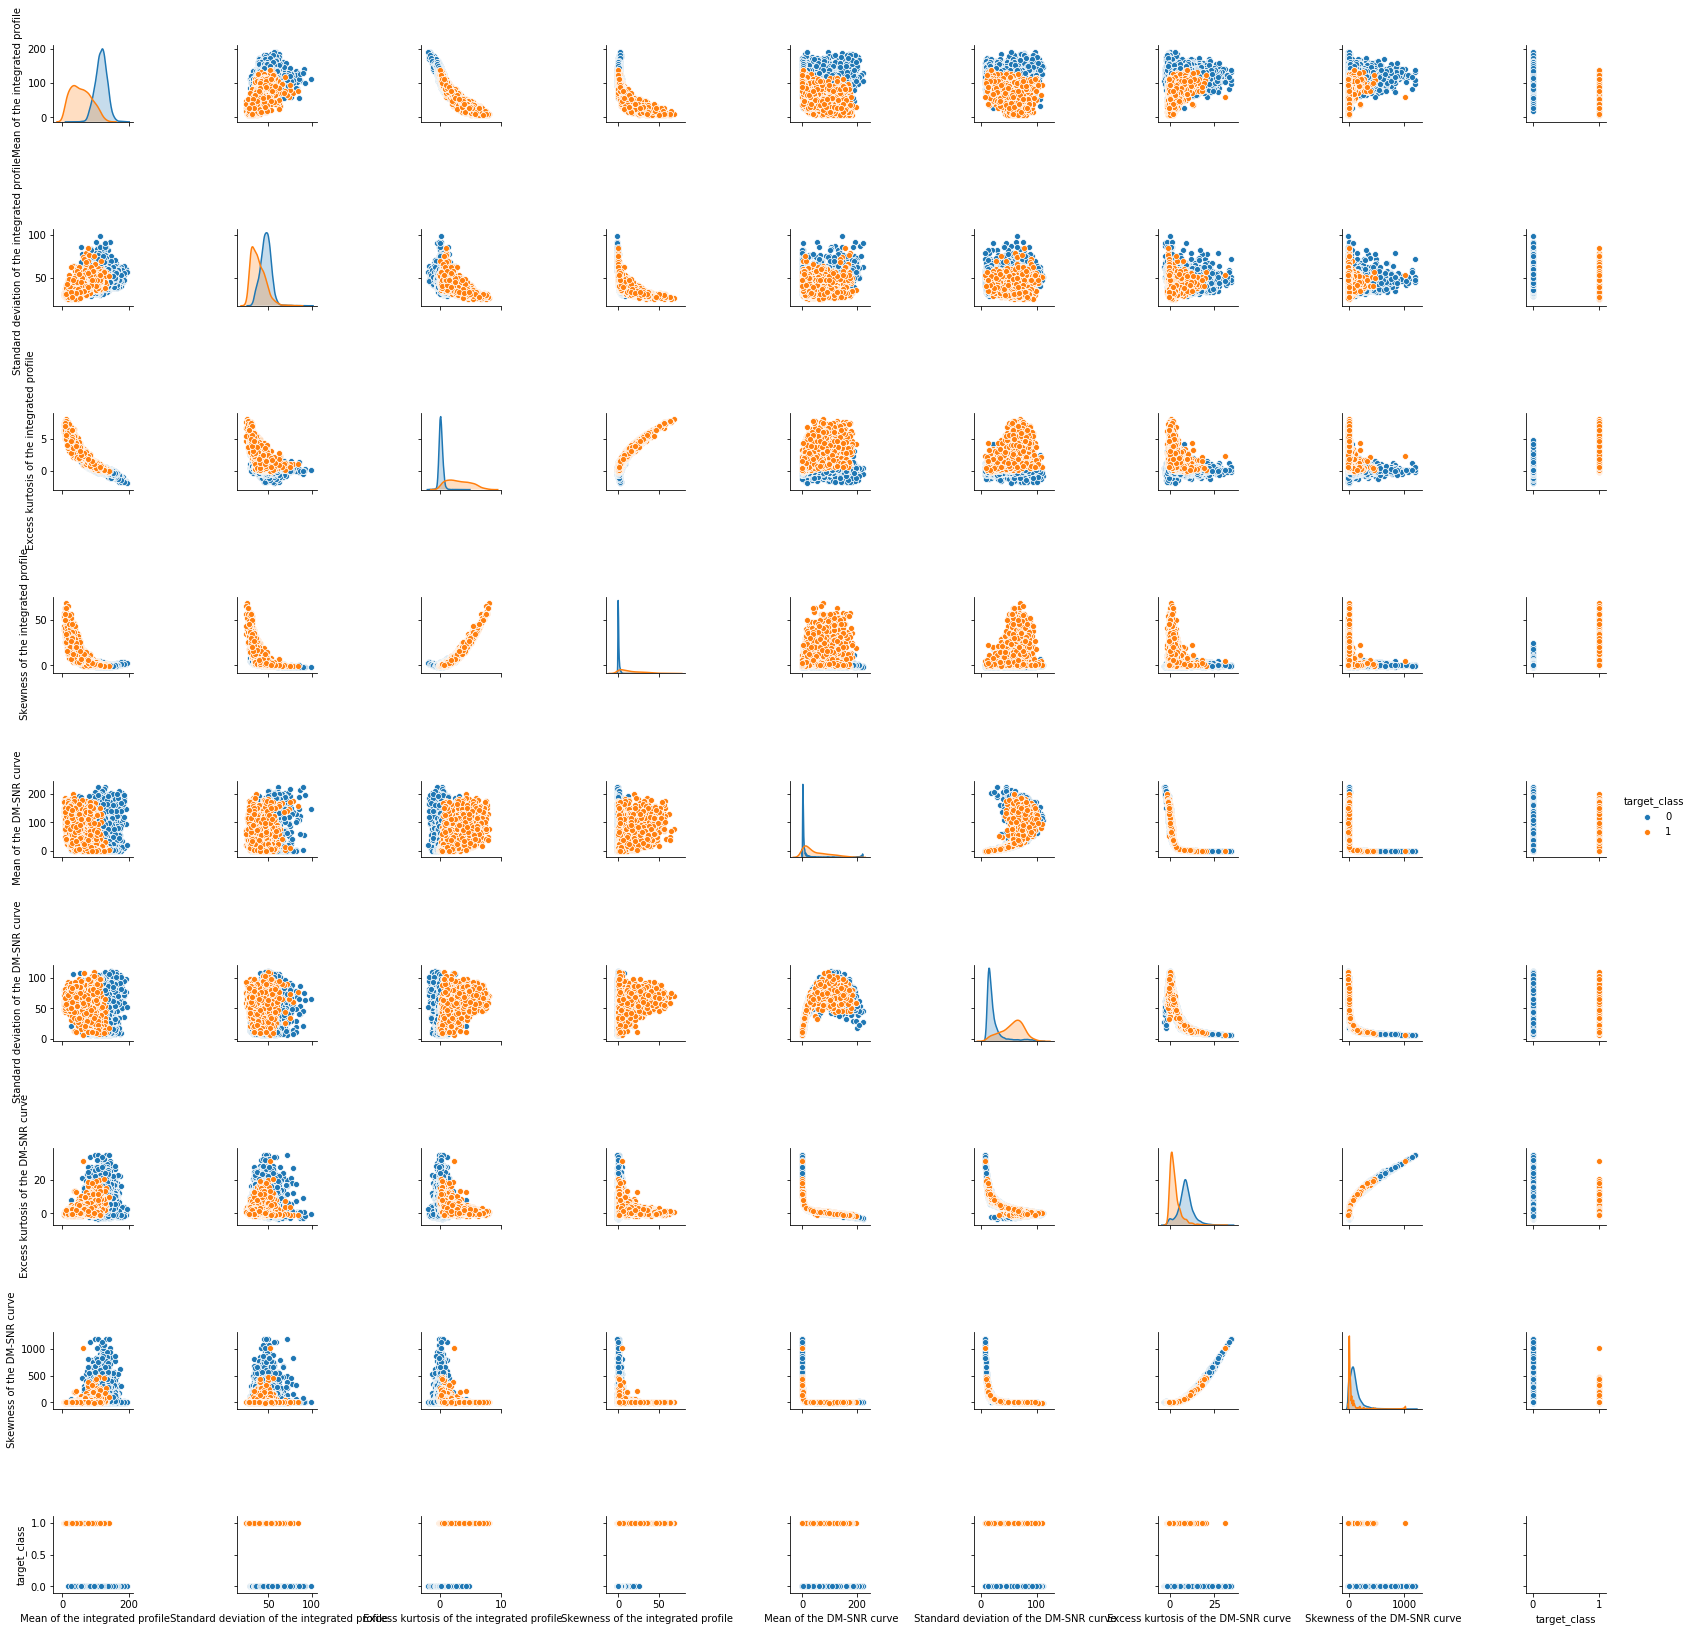

In [9]:
sns.pairplot(pdata,hue="target_class");

Getting principle components

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data[:,1:8])
pc = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc["target_class"]=data[:,8]


Train test split

In [44]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(pc,test_size = .3,random_state = 123)
# from itertools import product
# pcv=test.values
# zsv=pcv[pcv[:,2]==1]
# osv=pcv[pcv[:,2]==0]

# maxdatalen=min(len(zsv),len(osv))
# np.random.shuffle(zsv)
# np.random.shuffle(osv)
# a=zsv[0:maxdatalen,:]
# b=osv[0:maxdatalen,:]
# data2=np.concatenate((a,b),0)
# test=pd.DataFrame(data = data2, columns = ['pc1', 'pc2',"target_class"])
train_X = train[[x for x in train.columns if x not in ["target_class"]]]
train_Y = train[["target_class"]]
test_X  = test[[x for x in test.columns if x not in  ["target_class"]]]
test_Y  = test[["target_class"]]
# print(test_Y)
# train_Y=1-train_Y
# test_Y=1-test_Y    

Model

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc, matthews_corrcoef,cohen_kappa_score
def model(classifier,dtrain_x,dtrain_y,dtest_x,dtest_y):
    
    classifier =classifier.fit(dtrain_x,dtrain_y)
    #print(classifier)
    predictions = classifier.predict(dtest_x)
    #print(dtest_x,(predictions),len(dtest_x))

    ax = plt.gca()
    xlim =(-1,1)
    ylim =(-1,1)
    print(xlim)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    areas = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    decb(classifier,areas,dtest_x,dtest_y, predictions,xx,yy,xlim,ylim,ax )
    plt.figure()
    #decarea(dtest_x,predictions,dtc)
    cm=confusion_matrix(dtest_y,predictions)
    
    sns.heatmap(cm,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    plt.figure()
    tp=cm[1][1]
    fp=cm[0][1]
    tn=cm[0][0]
    fn=cm[1][0]
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    tpnr=tpr*tnr
    matthews=matthews_corrcoef(dtest_y, predictions)
    cohans_kappa=cohen_kappa_score(dtest_y, predictions)
    #print(matthews)
    acc=(tp+tn)/(tp+fn+tn+fp)
    precision=(tp)/(tp+fp)
    recall=tp/(tp+fn)
    F1score=2*precision*recall/(precision+recall)
    #area under curve
    print()
    predicting_probabilites = classifier.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    print("acc", "precision", "recall", "F1score","specificity","tpnr","matthews","cohans_kappa", "auc")
    print(acc, precision, recall, F1score,tnr, tpnr,matthews,cohans_kappa, auc(fpr,tpr))

Run decison tree

In [46]:
def decb(classifier,areas,X,yreal,y,xx,yy,xlim,ylim,ax):
    X=np.array(X.values)
    y=np.transpose(yreal.values).reshape(-1)
    visualize_tree(areas, X, y,xx,yy,xlim=xlim,ylim=ylim,ax=ax)


In [47]:
from ipywidgets import interact
def visualize_tree(Z, X, y,xx,yy, xlim, ylim, ax,boundaries=False):
    #     ax = ax or plt.gca()

    # Plot the testing points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',clim=(y.min()-1, y.max()+1), zorder=3)
    ax.axis('tight')
    ax.axis('off')

    # Plot the decision boundaries
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    print("reshaped",Z)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


from ipywidgets import interact



/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
No handles with labels found to put in legend.


(-1, 1)
reshaped [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


accuracy_score : 0.9424581005586592

classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4860
         1.0       0.85      0.48      0.61       510

   micro avg       0.94      0.94      0.94      5370
   macro avg       0.90      0.73      0.79      5370
weighted avg       0.94      0.94      0.94      5370

acc precision recall F1score specificity tpnr matthews cohans_kappa auc
0.9424581005586592 0.8501742160278746 0.47843137254901963 0.6122961104140527 0.9911522633744856 0.47419833777132253 0.6120898440671733 0.5838305556600579 0.7347918179617526


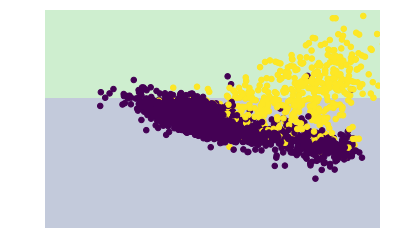

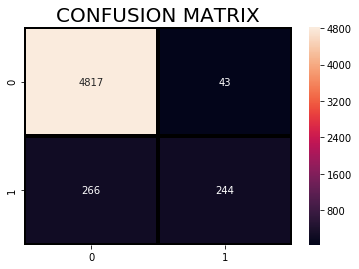

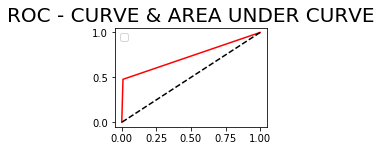

In [50]:
dt1 = DecisionTreeClassifier(max_leaf_nodes=2)
model(dt1,train_X,train_Y,test_X,test_Y)

/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
No handles with labels found to put in legend.


(-1, 1)
reshaped [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


accuracy_score : 0.9675977653631285

classification report :
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4860
         1.0       0.90      0.74      0.81       510

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.94      0.87      0.90      5370
weighted avg       0.97      0.97      0.97      5370

acc precision recall F1score specificity tpnr matthews cohans_kappa auc
0.9675977653631285 0.9019138755980861 0.7392156862745098 0.8125000000000001 0.9915637860082305 0.7329795045590253 0.7996705517941217 0.7949572086899276 0.9101942628903413


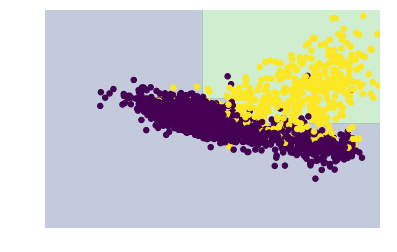

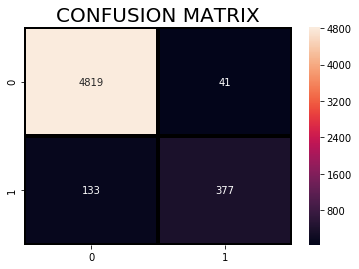

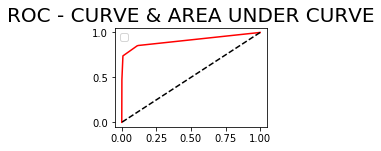

In [51]:

dt2 = DecisionTreeClassifier(max_leaf_nodes=5)
model(dt2,train_X,train_Y,test_X,test_Y)


/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
No handles with labels found to put in legend.


(-1, 1)
reshaped [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


accuracy_score : 0.9702048417132216

classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4860
         1.0       0.89      0.78      0.83       510

   micro avg       0.97      0.97      0.97      5370
   macro avg       0.93      0.89      0.91      5370
weighted avg       0.97      0.97      0.97      5370

acc precision recall F1score specificity tpnr matthews cohans_kappa auc
0.9702048417132216 0.8888888888888888 0.7843137254901961 0.8333333333333334 0.9897119341563786 0.7762446542402969 0.8189733553875042 0.8170435671393893 0.9314726055031064


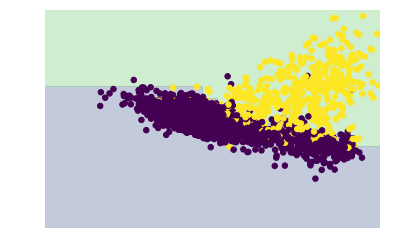

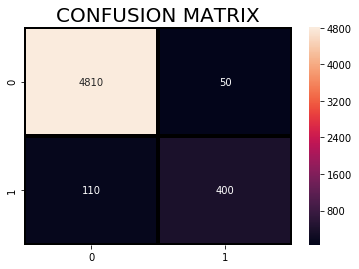

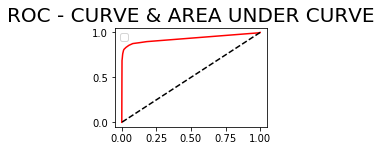

In [52]:
dt3 = DecisionTreeClassifier(max_leaf_nodes=20)
model(dt3,train_X,train_Y,test_X,test_Y)


/home/swapnil/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
No handles with labels found to put in legend.


(-1, 1)
reshaped [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


accuracy_score : 0.95512104283054

classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      4860
         1.0       0.76      0.77      0.77       510

   micro avg       0.96      0.96      0.96      5370
   macro avg       0.87      0.87      0.87      5370
weighted avg       0.96      0.96      0.96      5370

acc precision recall F1score specificity tpnr matthews cohans_kappa auc
0.95512104283054 0.7581573896353166 0.7745098039215687 0.7662463627546072 0.9740740740740741 0.7544299201161947 0.7414788003218471 0.7414271585698444 0.8742919389978213


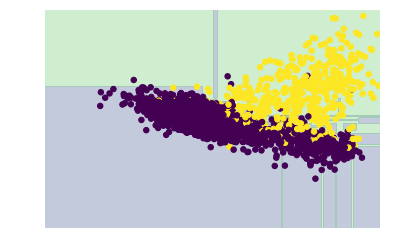

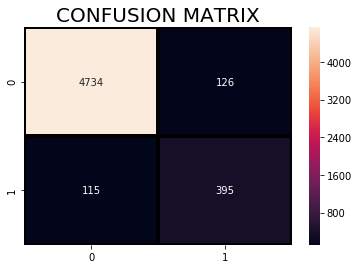

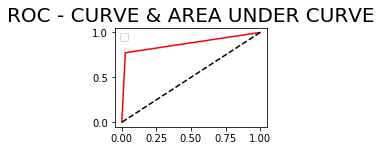

In [54]:
dt4 = DecisionTreeClassifier()
model(dt4,train_X,train_Y,test_X,test_Y)
